References and inspiration
- [Creating a stacked barchart in R with ggplot2 (CC102)](https://www.youtube.com/watch?v=NVym44SdcaE)
- [Showing groups on a scatter plot for an ordination using ggplot2 (CC079)](https://www.youtube.com/watch?v=Y0GI34S-ZMI)
- [Cédric Scherer—Outlier 2021—ggplot wizardy: my favorite tricks and secrets for beautiful plots in R](https://www.youtube.com/watch?v=7UjA_5gNvdw&list=PL-snVkXNPdldX6R-njgKP4b_PFmgaLyjg)
- [PCA and UMAP with tidymodels and cocktail recipes](https://www.youtube.com/watch?v=_1msVvPE_KY)

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(ggtext)
library(ggforce)
library(patchwork)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

Warning message:
"package 'readr' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

-- Attaching packages ------------------------------------------------------------------------------ tidymodels 0.1.3 --

v broom        0.7.9      v rsample      0.1.0 
v dials        0.0.9      v tune         0.1.6 
v infer        1.0.0      v workflows    0.2.3 
v modeldata    0.1.1      v workflowsets 0.1.0 
v parsnip      0.1.7      v yardstick 

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
# capitalizing species names
iris_changed <- iris %>%
    mutate(Species = str_to_title(Species))

head(iris_changed)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa
6,5.4,3.9,1.7,0.4,Setosa


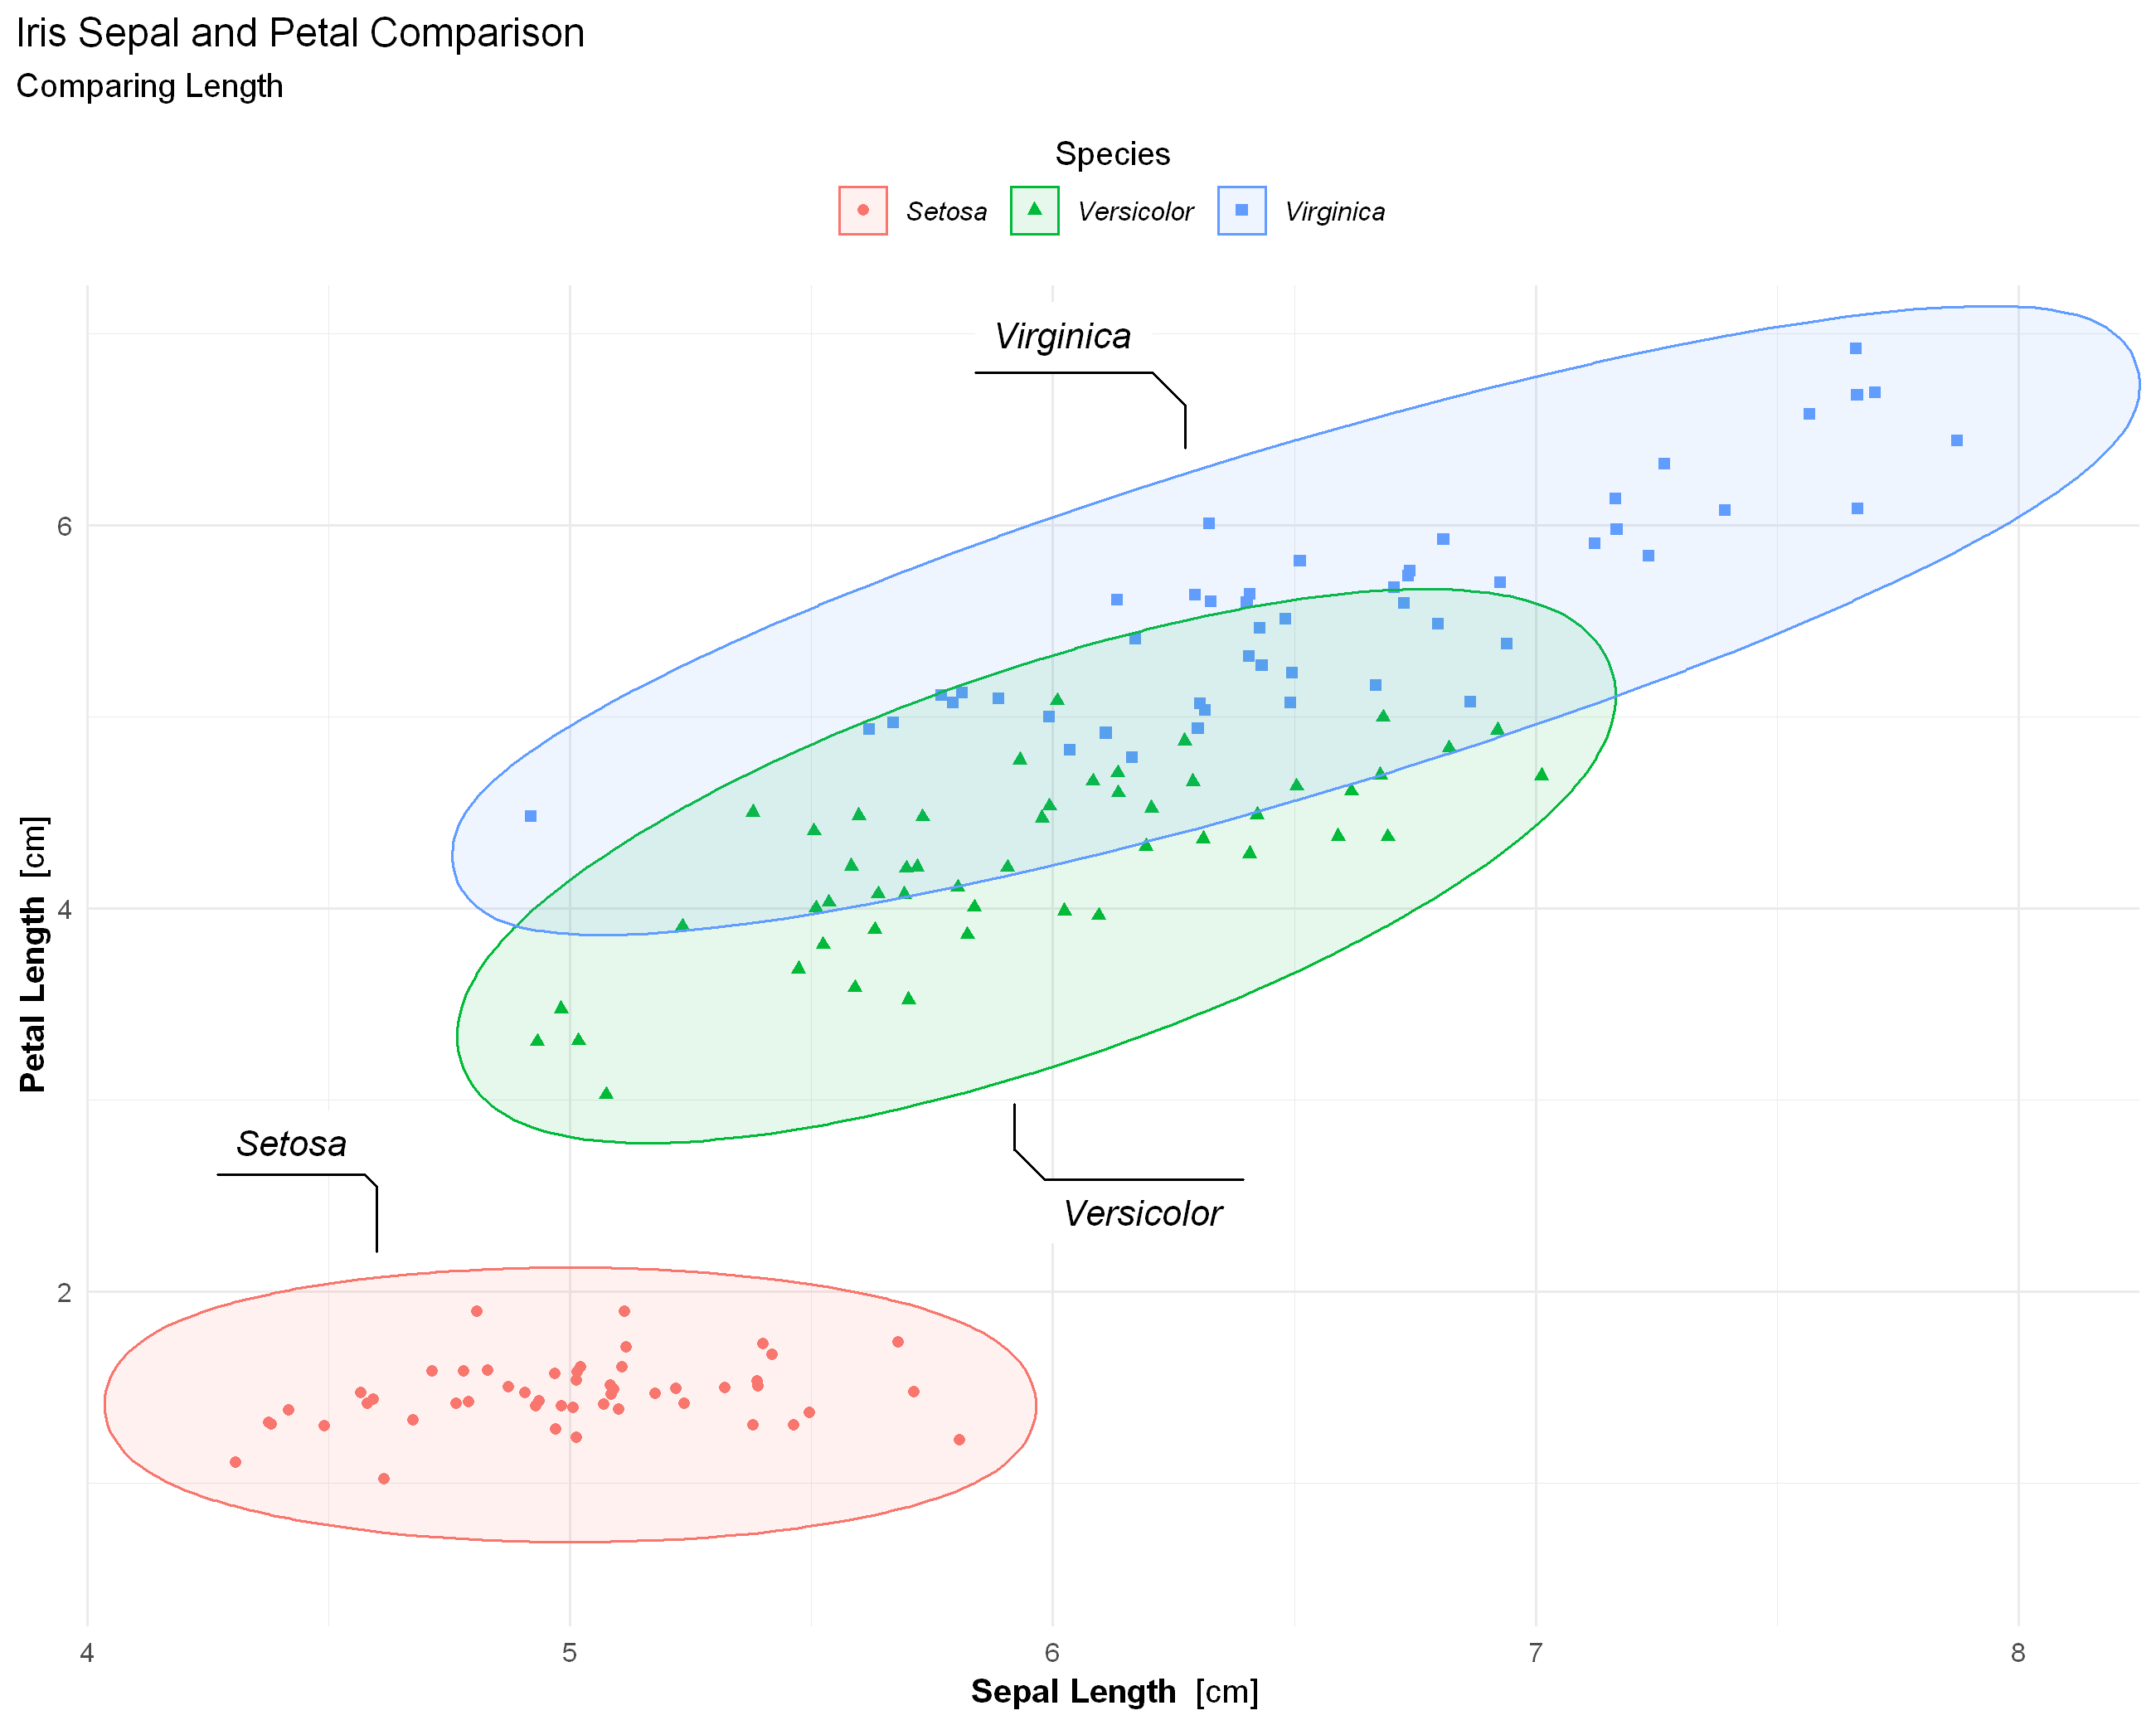

In [4]:
# creating visualization
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

p1 <- ggplot(iris_changed, aes(x = Sepal.Length, y = Petal.Length, color = Species, fill = Species)) + 
    geom_jitter(aes(shape = Species)) + 
    geom_mark_ellipse(aes(label = Species), alpha = 0.1, label.fontface = c("italic", "plain")) +
    labs(title = 'Iris Sepal and Petal Comparison', 
         x = '**Sepal Length** [cm]', 
         y = '**Petal Length** [cm]',
         subtitle = 'Comparing Length') + 
    theme_minimal() + 
    theme(axis.title.x = element_markdown(), 
          axis.title.y = element_markdown(), 
          plot.title.position = 'plot', 
          legend.position = 'top',
          legend.text = element_text(face = 'italic')) + 
    guides(shape = guide_legend(title.position = 'top', title.hjust = 0.5)) + 
    coord_cartesian(xlim = c(4, 8.25), ylim = c(0.25, 7.25), clip = 'off', expand = FALSE)

p1

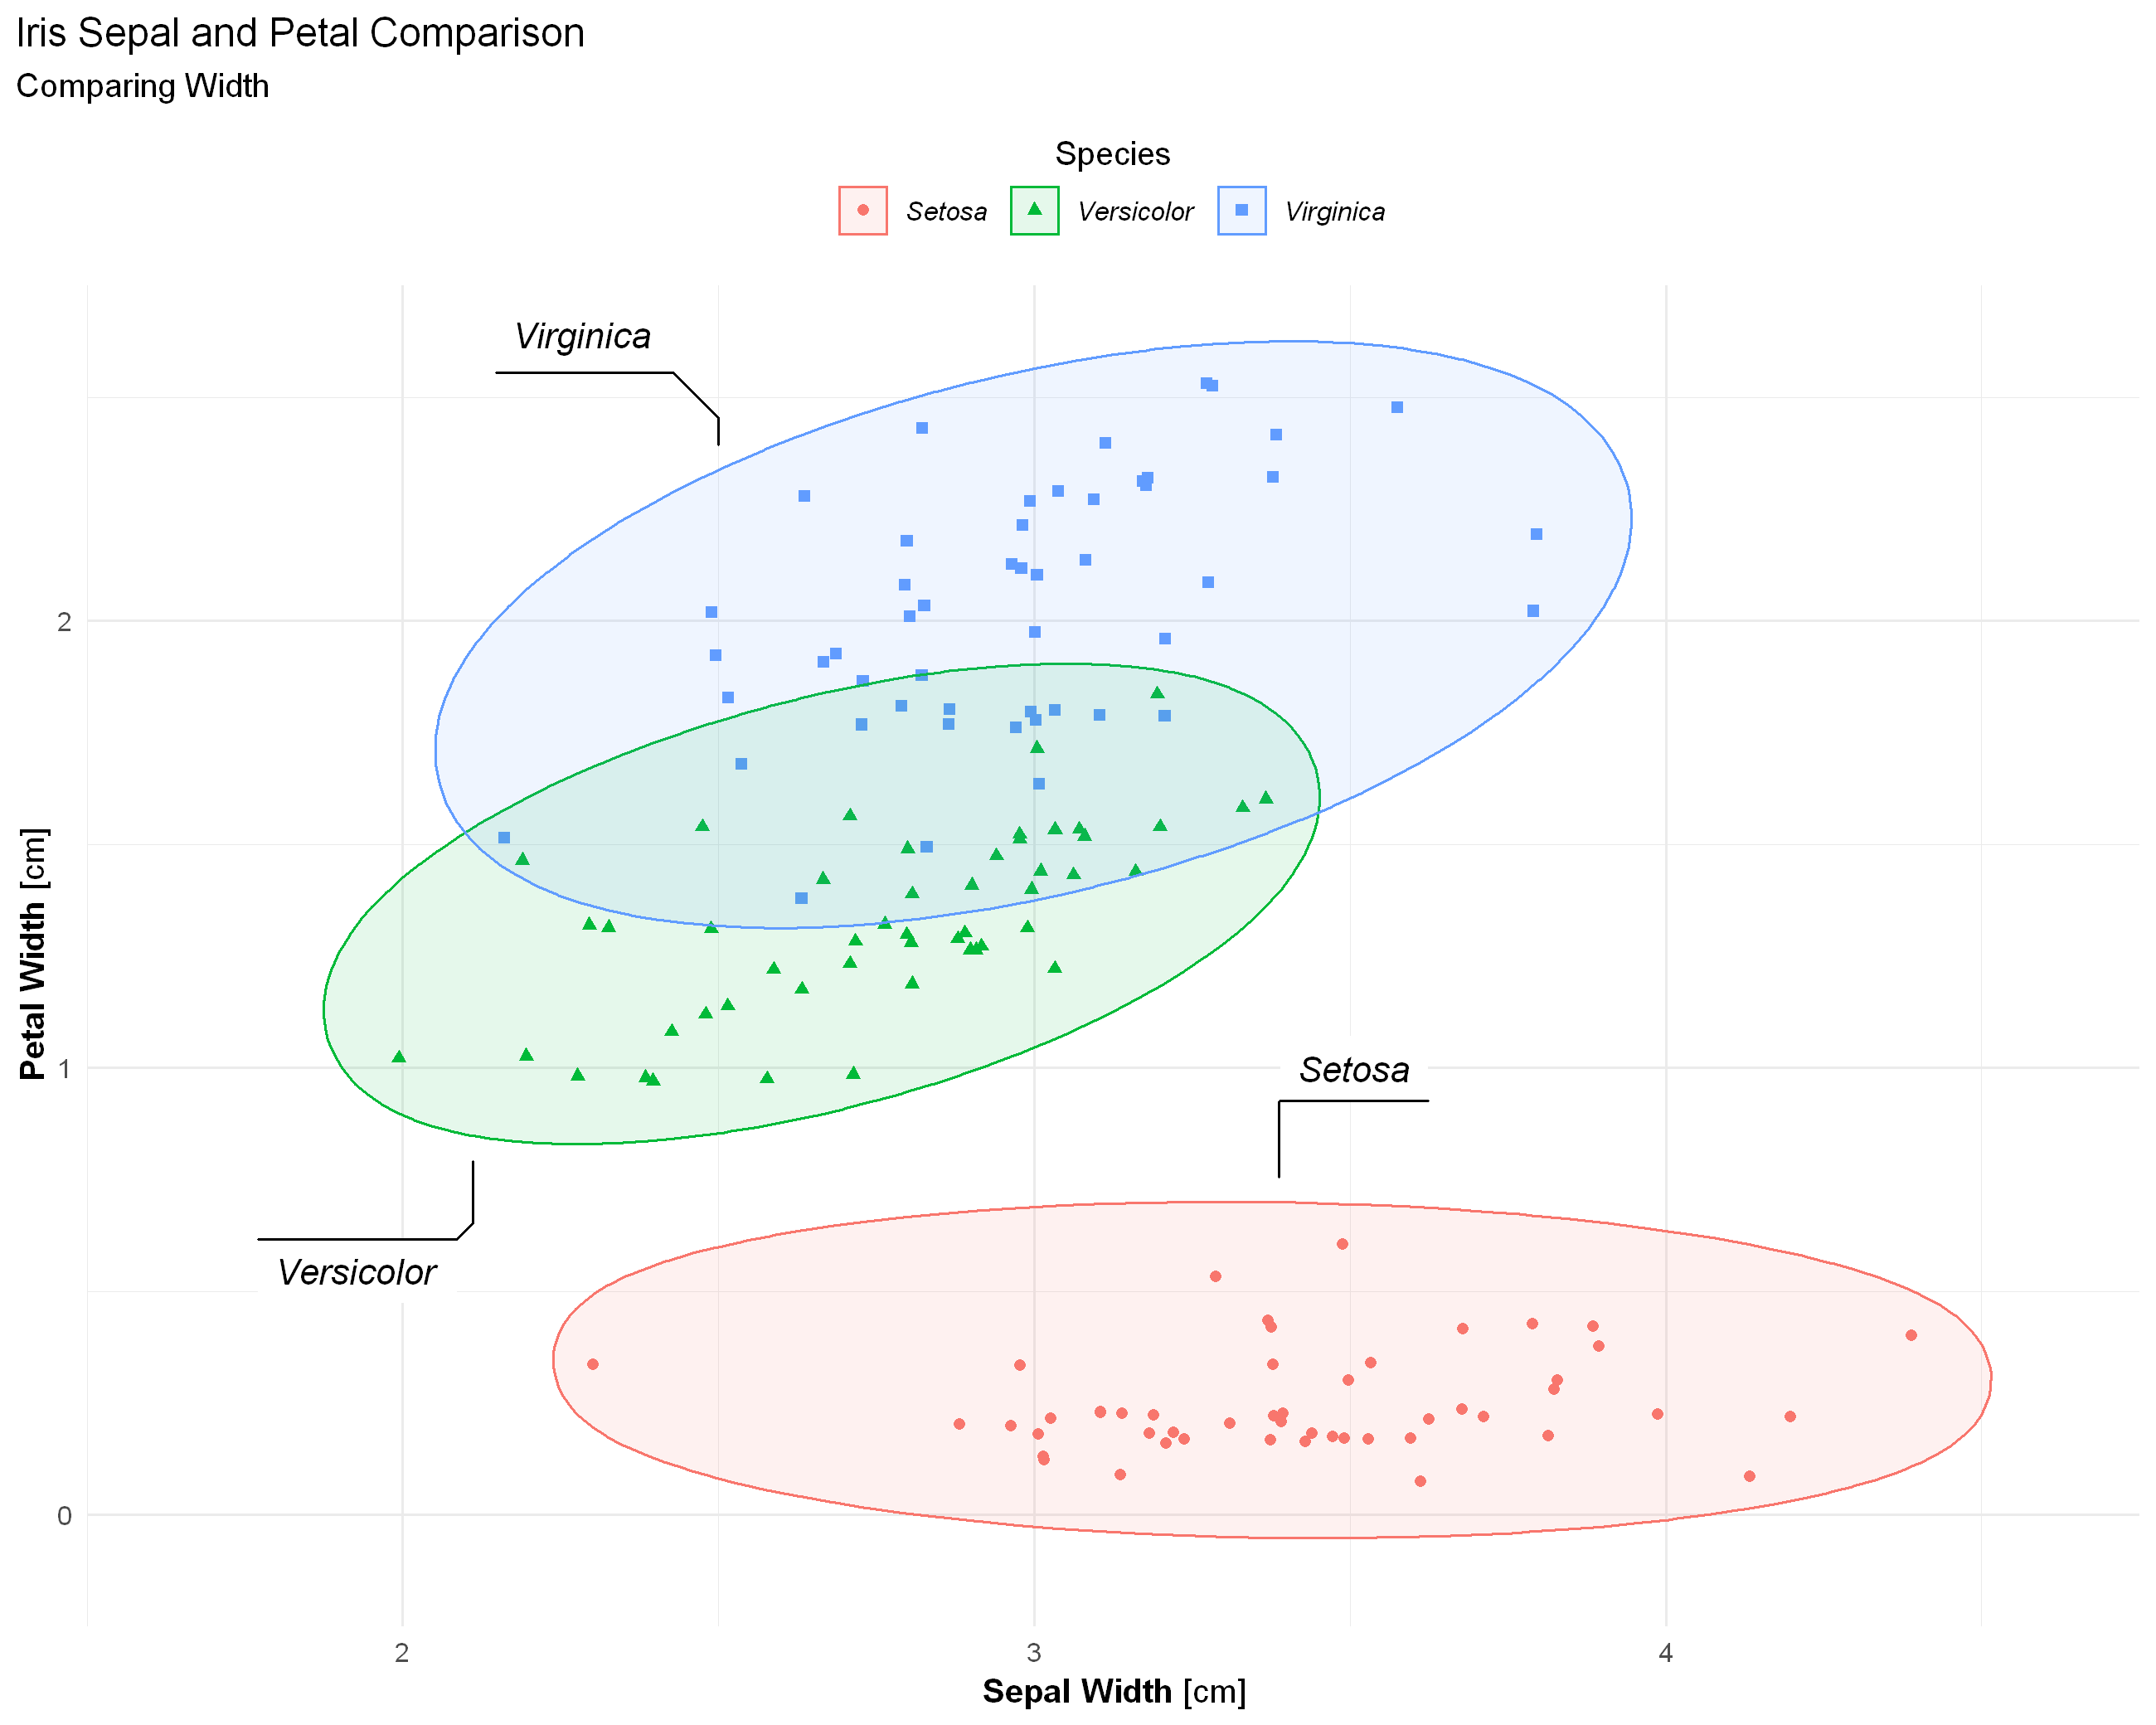

In [5]:
# creating visualization
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

p2 <- ggplot(iris_changed, aes(x = Sepal.Width, y = Petal.Width, color = Species, fill = Species)) + 
    geom_jitter(aes(shape = Species)) + 
    geom_mark_ellipse(aes(label = Species), alpha = 0.1, label.fontface = c("italic", "plain")) +
    labs(title = 'Iris Sepal and Petal Comparison', 
         x = '**Sepal Width** [cm]', 
         y = '**Petal Width** [cm]',
         subtitle = 'Comparing Width') + 
    theme_minimal() + 
    theme(axis.title.x = element_markdown(), 
          axis.title.y = element_markdown(), 
          plot.title.position = 'plot', 
          legend.position = 'top',
          legend.text = element_text(face = 'italic')) + 
    guides(shape = guide_legend(title.position = 'top', title.hjust = 0.5)) + 
    coord_cartesian(xlim = c(1.5, 4.75), ylim = c(-0.25, 2.75), clip = 'off', expand = FALSE)

p2

# Principal Component Analysis

In [6]:
iris_formatted <- iris %>%
    mutate(ID = row_number())

head(iris_formatted)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,3
4,4.6,3.1,1.5,0.2,setosa,4
5,5.0,3.6,1.4,0.2,setosa,5
6,5.4,3.9,1.7,0.4,setosa,6


In [7]:
pca_recipe <- recipe(~ ., data = iris_formatted) %>%
    update_role(Species, ID, new_role = 'id') %>%
    step_normalize(all_predictors()) %>%
    step_pca(all_predictors())

pca_prep <- prep(pca_recipe)

pca_prep

Data Recipe

Inputs:

      role #variables
        id          2
 predictor          4

Training data contained 150 data points and no missing data.

Operations:

Centering and scaling for Sepal.Length, Sepal.Width, ... [trained]
PCA extraction with Sepal.Length, Sepal.Width, ... [trained]

In [8]:
tidy_pca <- tidy(pca_prep, 2)

tidy_pca

terms,value,component,id
<chr>,<dbl>,<chr>,<chr>
Sepal.Length,0.52106591,PC1,pca_IpWGi
Sepal.Width,-0.26934744,PC1,pca_IpWGi
Petal.Length,0.58041310,PC1,pca_IpWGi
Petal.Width,0.56485654,PC1,pca_IpWGi
Sepal.Length,-0.37741762,PC2,pca_IpWGi
Sepal.Width,-0.92329566,PC2,pca_IpWGi
Petal.Length,-0.02449161,PC2,pca_IpWGi
Petal.Width,-0.06694199,PC2,pca_IpWGi
Sepal.Length,0.71956635,PC3,pca_IpWGi


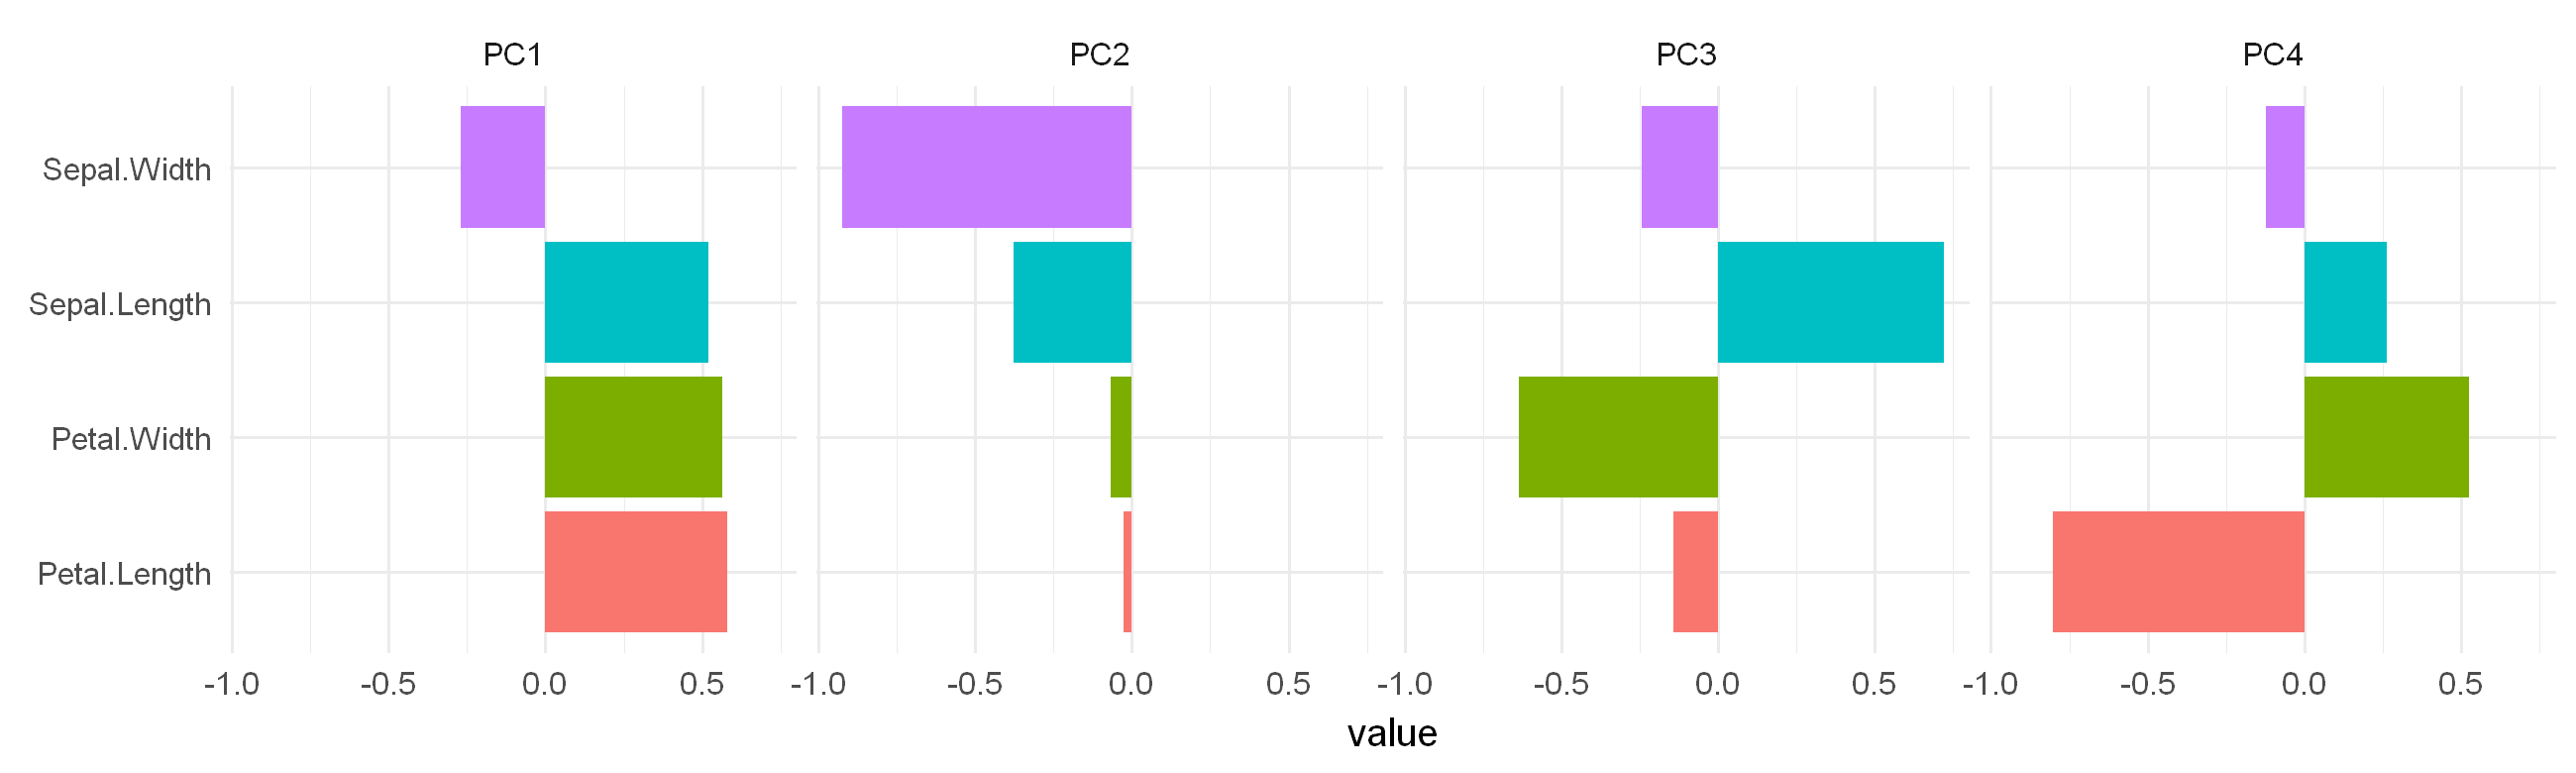

In [9]:
options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res=260)

tidy_pca %>%
    mutate(component = fct_inorder(component)) %>%
    ggplot(aes(value, terms, fill = terms)) + 
        geom_col(show.legend = FALSE) + 
        facet_wrap(~component, nrow = 1) + 
        labs(y = NULL) + 
        theme_minimal()

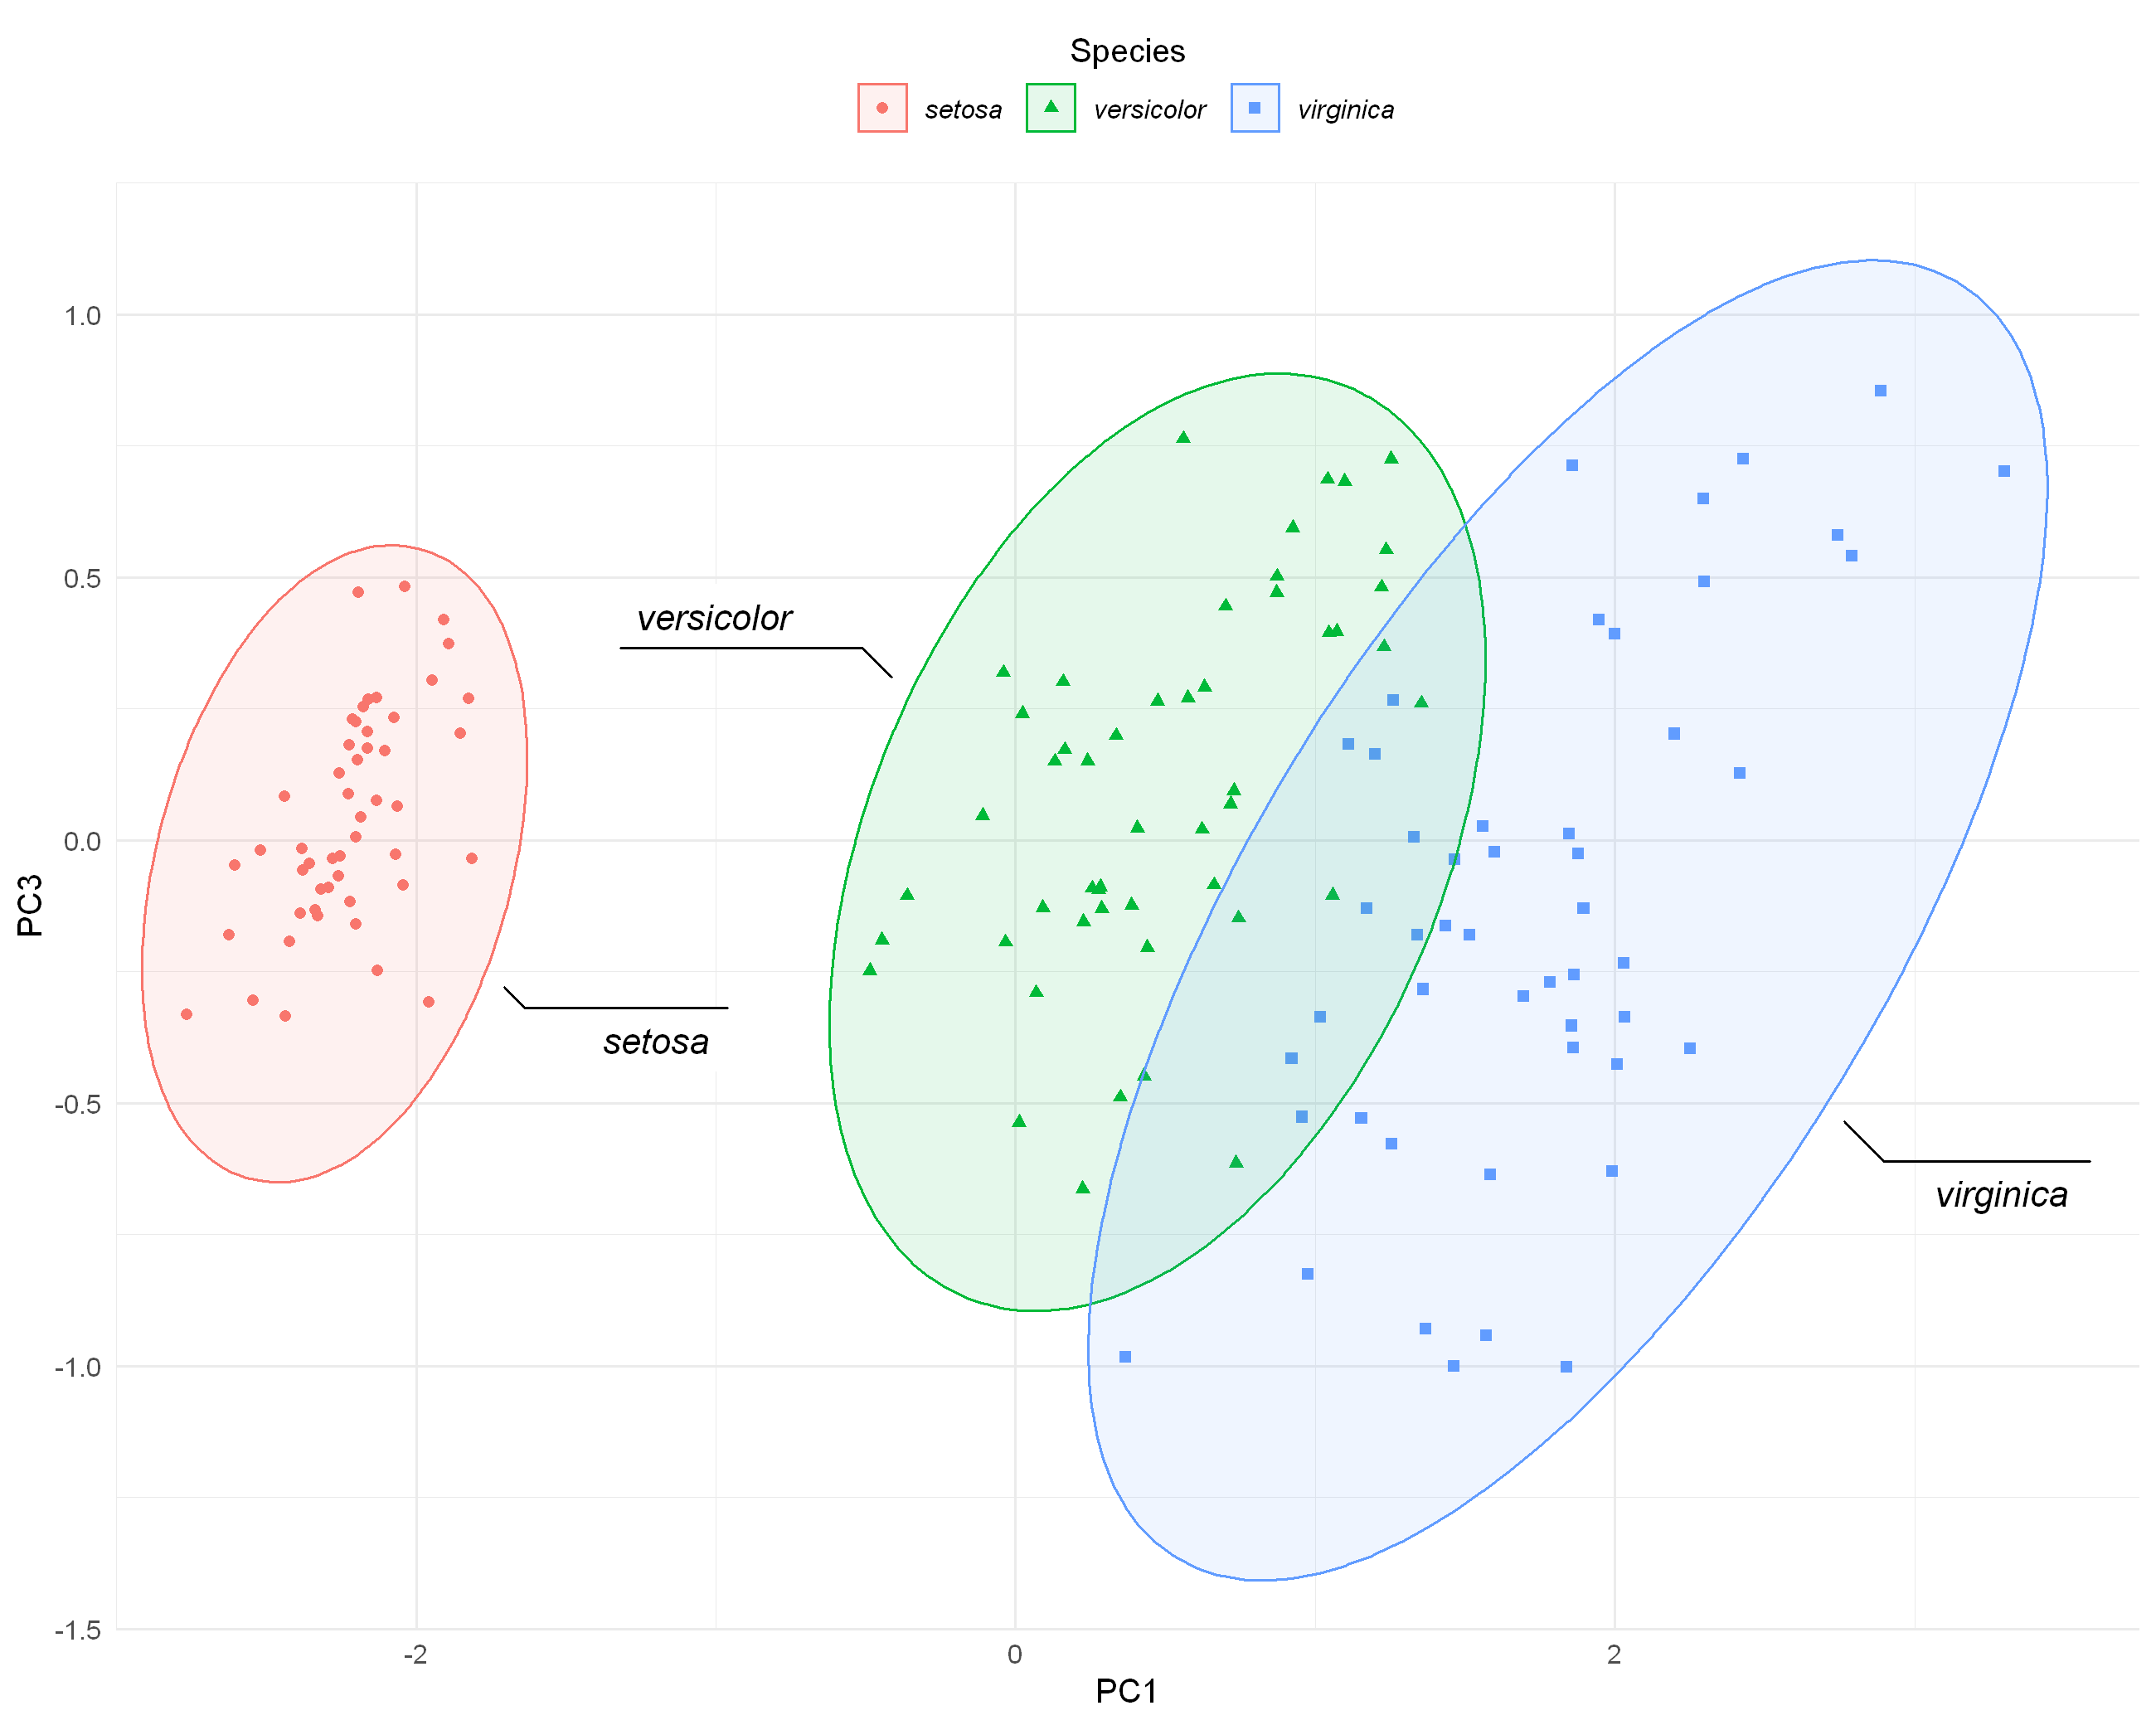

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

juice(pca_prep) %>%
    ggplot(aes(PC1, PC3, color = Species, fill = Species)) + 
        geom_jitter(aes(shape = Species)) + 
        geom_mark_ellipse(aes(label = Species), alpha = 0.1, label.fontface = c("italic", "plain")) +
        theme_minimal() + 
        theme(legend.position = 'top',
              legend.text = element_text(face = 'italic')) + 
        guides(shape = guide_legend(title.position = 'top', title.hjust = 0.5)) + 
        coord_cartesian(xlim = c(-3.0, 3.75), ylim = c(-1.5, 1.25), clip = 'off', expand = FALSE)